In [1]:
import pandas as pd # import libraries
import numpy as np
from matplotlib import pyplot as plt

import warnings as wr # ignore warning message
wr.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Height-Weight Data.csv') # read dataframe

In [3]:
df.head() #displays the first five rows of the dataframe by default

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.shape #obtain the shape of a DataFrame

(3501, 2)

Text(0.5, 1.0, 'Height and weight table')

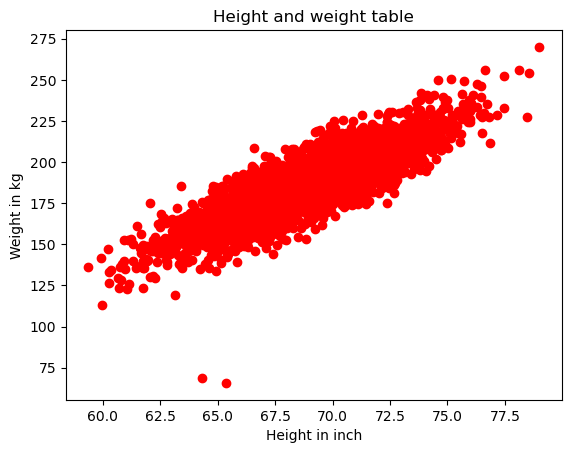

In [5]:
plt.scatter(df.Height, df.Weight, color='red') #a diagram where each value in the data set is represented by a dot
plt.xlabel('Height in inch') #labeling the height
plt.ylabel('Weight in kg') #labeling the weight
plt.title('Height and weight table') #mension the title of the table

In [6]:
x=df.drop('Weight', axis=1) # drop column
y=df[['Weight']]

In [7]:
x.head() #displays the height data from the dataframe

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [8]:
y.head() #displays the weight data from the dataframe

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [9]:
x.mean() #displays the height mean

Height    69.024411
dtype: float64

In [10]:
y.mean() #displays the weight mean

Weight    186.891258
dtype: float64

In [11]:
from sklearn.model_selection import train_test_split # import model split

In [12]:
train, test = train_test_split(df, test_size=.25) #testing data=25% and trainig data 75%

In [13]:
train.shape #these are traing data

(2625, 2)

In [14]:
test.shape #these data for testing

(876, 2)

In [15]:
train.head() #training data frame

,Height,Weight
1424,67.531657,164.004353
1902,61.764509,135.544201
1922,77.446620,232.651079
1825,64.608099,172.315967
2669,67.718393,182.361397


In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.25, random_state=0) # perfect data split rule for testing data=25%


In [17]:
xtrain.head() # after split xtrain dataframe

,Height
1310,67.847749
3153,65.215556
3333,63.873409
1002,69.156982
1765,68.503261


In [18]:
ytrain.head() # after split ytrain dataframe

,Weight
1310,153.031321
3153,174.931143
3333,152.554620
1002,206.515190
1765,193.982059


# Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression # import linear regression


In [20]:
lr = LinearRegression() #variable create
lr.fit(xtrain, ytrain) #model apply

LinearRegression()

In [21]:
m = lr.coef_ # coefficient value
m

array([[5.96613032]])

In [22]:
c = lr.intercept_ # intercept
c

array([-224.98706384])

In [23]:
yp = (m*68.936358)+c # manual method
yp

array([[186.29623193]])

In [24]:
lr.predict([[63.873409]]) # manual predict

array([[156.09001838]])

In [25]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [26]:
df['predicted_weight'] = lr.predict(x)
df.head()

,Height,Weight,predicted_weight
0,73.847017,241.893563,215.593864
1,68.781904,162.310473,185.374740
2,74.110105,212.740856,217.163483
3,71.730978,220.042470,202.969301
4,69.881796,206.349801,191.936837


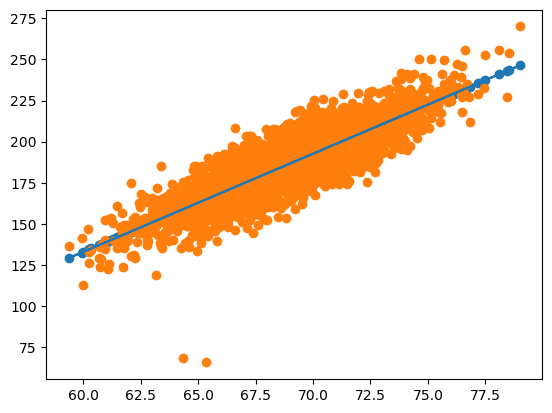

In [30]:
plt.plot(x,df[['predicted_weight']])  # actual weight and predicted weight using scatter plot
plt.scatter(x,df[['predicted_weight']])
plt.scatter(x, df[['Weight']])


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error # import mse and mae


In [32]:
mse = mean_squared_error(ytest, lr.predict(xtest)) # apply mse
mae = mean_absolute_error(ytest, lr.predict(xtest)) # apply mae

In [33]:
mse # mean squared error

103.70875574105973

In [34]:
mae # mean absolute error


8.145588569833935

In [35]:
lr.score(xtest, ytest)  # linearRegression model score performance

0.7400625947962998

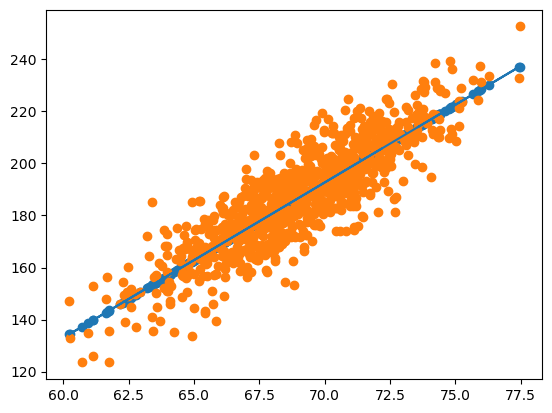

In [38]:
plt.plot(xtest, lr.predict(xtest)) # actual data and predicted data 
plt.scatter(xtest, lr.predict(xtest))
plt.scatter(xtest,ytest)